# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [4]:
# Import the CSVs to Pandas DataFrames

#file_path_3 = Path("Data/to_dwellings_df.csv")
#to_dwellings_df = pd.read_csv(file_path_3)
file_path1 = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path1, index_col="year")

file_path2 = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path2)

In [5]:
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [6]:
# Create a list with the dwelling types
dwelling_types = [
    "single_detached_house",
    "apartment_five_storeys_plus",
    "movable_dwelling",
    "semi_detached_house",
    "row_house",
    "duplex",
    "apartment_five_storeys_less",
    "other_house"
]
# Getting the data from the top 10 expensive neighbourhoods
top_ten=to_data.groupby('neighbourhood').mean()
top_ten_data=top_ten.sort_values('average_house_value', ascending=False).reset_index()
top_ten_df=top_ten_data.iloc[0:10]
top_ten_df

# Calculate the mean number of dwelling types units per year
mean_dwelling_df=to_data.groupby("year").mean()

# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_data = to_data[["shelter_costs_owned","shelter_costs_rented"]]

avr_monthly_shelter_df = shelter_data.groupby("year").mean()
owned_shelter = avr_monthly_shelter_df[["shelter_costs_owned"]]
rented_shelter =avr_monthly_shelter_df[["shelter_costs_rented"]]

# avr house value per year
avr_house_data= to_data[["average_house_value"]]
avr_house_df = avr_house_data.groupby("year").mean()

# Calculate the sum number of dwelling types units per year (hint: use groupby)

dwelling_data = to_data[["single_detached_house","apartment_five_storeys_plus","movable_dwelling", "semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house"]]

to_dwellings_df = dwelling_data.groupby(dwelling_data.index).sum()


# Fetch the data of all dwelling types per year
num_dwelling_type= pd.read_csv(file_path1)



### Panel Visualization Functions

In [10]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
   
    # Calculate the mean values for each neighborhood
    neighbourhood_map_mean_data=to_data.groupby('neighbourhood').mean()
    neighbourhood_map_mean_data2=neighbourhood_map_mean_data.iloc[0:5].reset_index()
    neighbourhood_map_mean_df=neighbourhood_map_mean_data2.drop(columns='neighbourhood')

    # Join the average values with the neighbourhood locations
    joined_avr_values_df= pd.concat([df_neighbourhood_locations,neighbourhood_map_mean_df],join='inner',axis='columns')
    
    map = px.scatter_mapbox(
    joined_avr_values_df,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=9,
    hover_name="neighbourhood",
    hover_data = [
        "shelter_costs_owned",
        "shelter_costs_rented",
        "single_detached_house",
        "apartment_five_storeys_plus",
        "movable_dwelling",
        "semi_detached_house",
        "row_house",
        "duplex",
        "apartment_five_storeys_less",
        "other_house"
    ],
    title="Averange House Values in Toronto",
    height=600
)
      # Plotly pane
    plotly_panel = pn.pane.Plotly(map)
    plotly_panel._updates = True
    
    return plotly_panel
                                   

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    bar_plot=plt.figure()
    first_bar = data.plot.bar(color=color)
    first_bar.set_title(title)
    first_bar.set_xlabel(xlabel)
    first_bar.set_ylabel(ylabel)
    plt.close(bar_plot)
    
    return pn.pane.Matplotlib(bar_plot, tight=True)

  
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """ 
    line_plot=plt.figure()
    first_line = data.plot.line(color=color)
    first_line.set_title(title)
    first_line.set_xlabel(xlabel)
    first_line.set_ylabel(ylabel)
    plt.close(line_plot)
    
    return pn.pane.Matplotlib(line_plot, tight=True)

    
def average_house_value():
    """Average house values per year."""
     # Calculate the average house value per year
    avg_house_data= to_data[["average_house_value"]]
    avg_house_df = avg_house_data.groupby("year").mean()
    avg_house_df.head()
    
    # Plot the average house value per year as a line chart
    avg_house_value = plt.figure()
    avg_house_line_plot = avg_house_df.plot()
    avg_house_line_plot.set_xlabel("Year", fontsize=12)
    avg_house_line_plot.set_ylabel("Avg. House Value", fontsize=12)
    avg_house_line_plot.set_title(
    "Average House Value in Toronto",
)
  
    plt.close(avg_house_value)
    
    return pn.pane.Matplotlib(avg_house_value, tight=True)
 
 # 
def average_value_by_neighbourhood():
    """Number of dwelling types per year"""
    # Create a new DataFrame with the mean house values by neighbourhood per year
    neighbourhood_data = to_data[["neighbourhood","average_house_value"]]

    neighbourhood_house_df = neighbourhood_data.drop_duplicates()

    # Use hvplot to create an interactive line chart of the average house value per neighbourhood
    # The plot should have a dropdown selector for the neighbourhood
    neighbourhood_house_df.hvplot(groupby='neighbourhood')

    return neighbourhood_house_df
    
def number_dwelling_types():
    """Number of dwelling types per year"""
    # Fetch the data of all dwelling types per year
    num_dwelling_type = to_data.reset_index()
    # Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
    # The plot should have a dropdown selector for the neighbourhood
    number_dwellings_plot = num_dwelling_type.hvplot.bar(
        "year",
        dwelling_types,
        xlabel="Year",
        ylabel="Dwelling Type Units",
        rot=90,
        height=500,
        groupby="neighbourhood",
    )

    return number_dwellings_plot
    
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    cost_bar_chart = px.bar(
        to_data,
        x="neighbourhood",
        y="average_house_value",
        color="average_house_value",
        height=1024,
        facet_row=to_data.index,
        title="Toronto Neighbourhoods Average House values",
        labels={
        "neighbourhood": "Neighbourhoods",
        "average_house_value": "Avgerage House Value"
        }
    )
    return cost_bar_chart 

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    top_ten_plot=top_ten_df.hvplot.bar(title="Top 10 Expensive Neighbourhoods",rot=90, x='neighbourhood',xlabel='Neighbourhood',ylabel='Avg House Value')
    return top_ten_plot


def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
  # Fetch the data from all expensive neighbourhoods per year.
    expensive_toronto_neighbouhoods_df = to_data[to_data["neighbourhood"].isin(top_ten_df["neighbourhood"])]
    expensive_toronto_neighbouhoods_df  = expensive_toronto_neighbouhoods_df.reset_index()
    
    expensive_sunburst = px.sunburst(
        expensive_toronto_neighbouhoods_df,
        path=["year", "neighbourhood"],
        values='average_house_value',
        color='shelter_costs_owned',
        hover_data=['shelter_costs_owned', 'shelter_costs_rented'],
        color_continuous_scale='Blues',
        title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
     )
    
    return expensive_sunburst


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

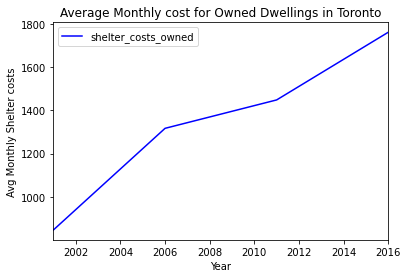

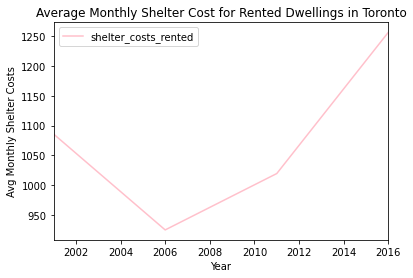

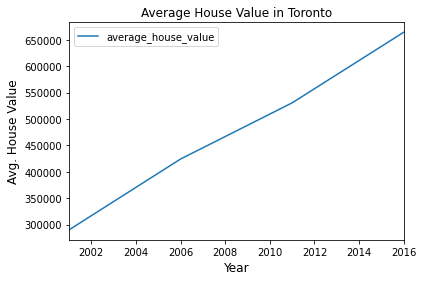

In [11]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Alexander McMullan's Real Estate Analysis of Toronto (2001 to 2016)
  
  """,
    width=800,
)

# Define a welcome text
welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of historical house values,
dwelling types per neighbourhood and dwelling costs in Toronto, Ontario
according to census data from 2001 to 2016. You can navigate through the tabs above
to explore more details about the evolution of the real estate market on The 6 across these years.
""",
    width=1024,
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    # First tab
    (
        "Welcome",
        pn.Column(
            welcome,
            neighbourhood_map()
        )
    ),
    # Second tab
    (
        "Yearly Market Analysis",
        pn.Column(
                pn.Row(
                    create_bar_chart(
                        to_dwellings_df.loc[2001],
                        "Dwelling Types in Toronto", 
                        "2001",
                        "Dwelling type unit",
                        "red"
                    ),
                    create_bar_chart(
                        to_dwellings_df.loc[2006],
                        "Dwelling Types in Toronto",
                        "2006",
                        "Dwelling Type Units",
                        "blue"
                    ),
                ),
                pn.Row(
                    create_bar_chart(
                        to_dwellings_df.loc[2011],
                        "Dwelling Types in Toronto",
                        "2011",
                        "Dwelling Type Units",
                        "purple"
                    ),
                    create_bar_chart(
                        to_dwellings_df.loc[2016],
                        "Dwelling Types in Toronto",
                        "2016",
                        "Dwelling Type Units",
                        "green"
                    ),                    
                )
        )
    ),
    # Third tab
    (
        "Shelter Costs Vs. House Value",
        pn.Column(
            create_line_chart(
                 owned_shelter,
                "Average Monthly cost for Owned Dwellings in Toronto", 
                "Year",
                "Avg Monthly Shelter costs",
                "blue"
            ),
            create_line_chart(
                 rented_shelter,
                "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
                "Year",
                "Avg Monthly Shelter Costs",
                "pink"
            ),
            average_house_value(),
        ),
    ),
    # Forth Tab
( 
        "Neighbourhood Analysis",
        pn.Row(
            pn.Column(
                average_value_by_neighbourhood(),
                number_dwelling_types(),
            ),
            pn.Column(
                average_house_value_snapshot(),
            ) 
        )
    ),
    # Fifth tab
(
        "Top Expensive Neighbourhoods",
        pn.Row(
            top_most_expensive_neighbourhoods(),
             sunburts_cost_analysis(),
        )
    )
)

# Create the main dashboard
dashboard = pn.Column(
    pn.Row(title),
    tabs,
    width=1024,
    height=768
)

## Serve the Panel Dashboard

Column(height=768, sizing_mode='fixed', width=1024)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=1024)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [3] Row
            [0] Column
                [0] DataFrame(DataFrame)
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
            [1] Column
                [0] Plotly(Figure)
        [4] Row
            [0] HoloViews(Bars)
            [1] Plotly(Figure)
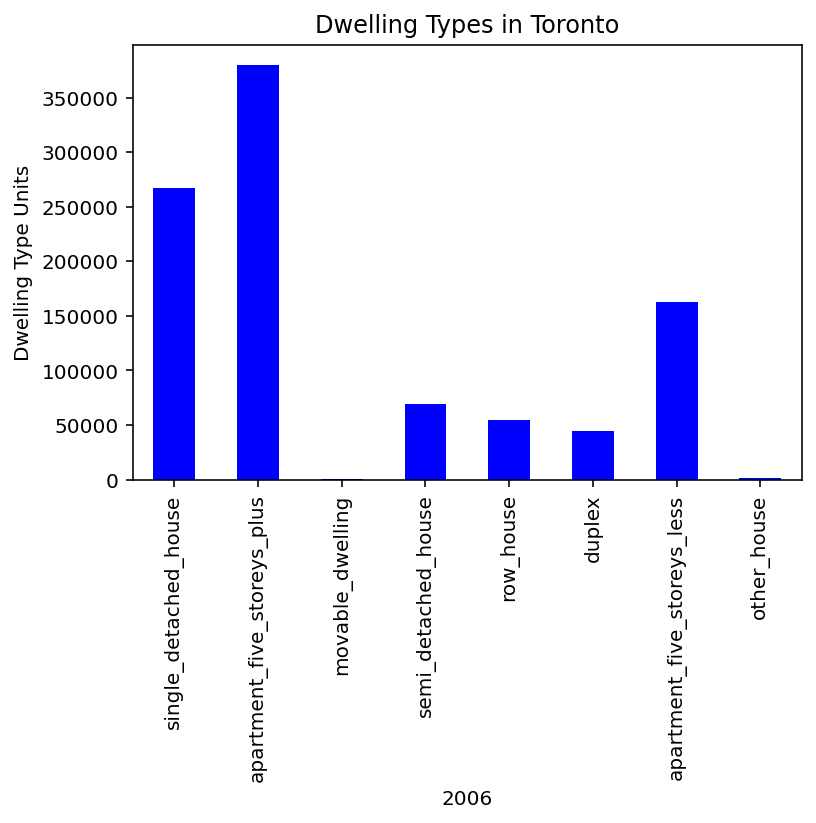
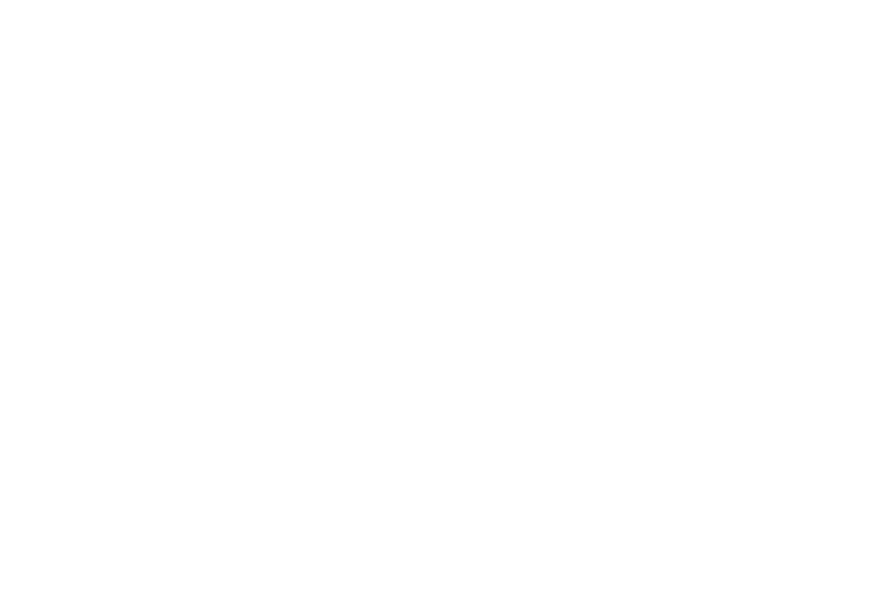
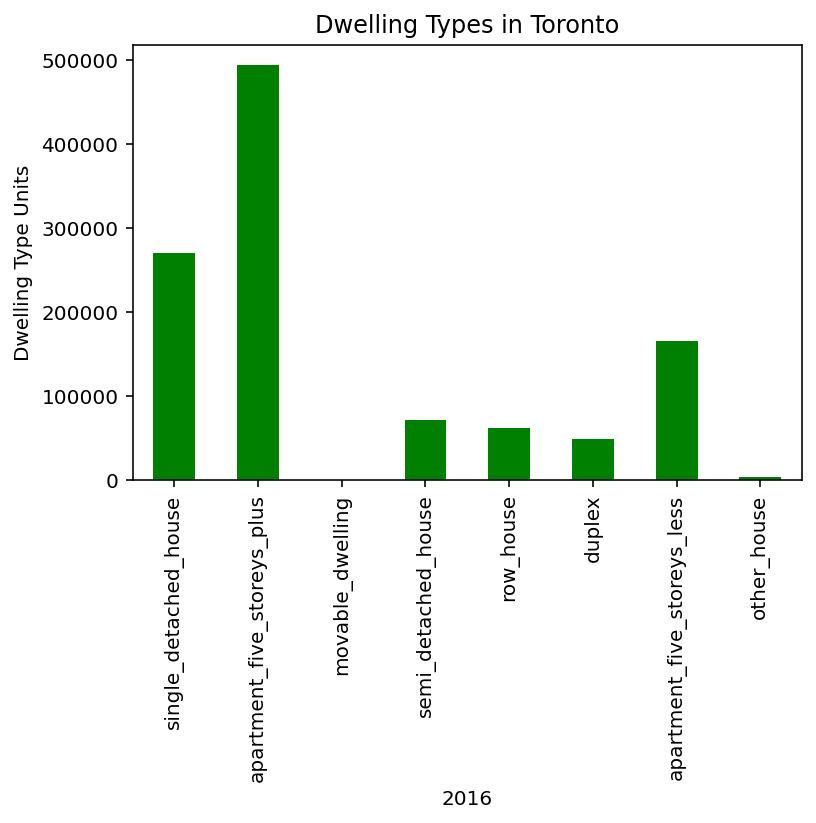
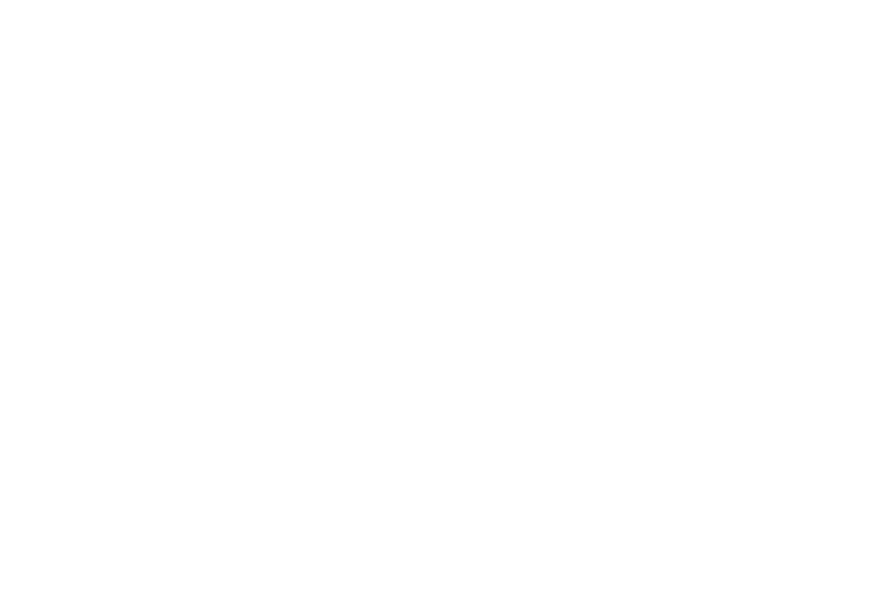
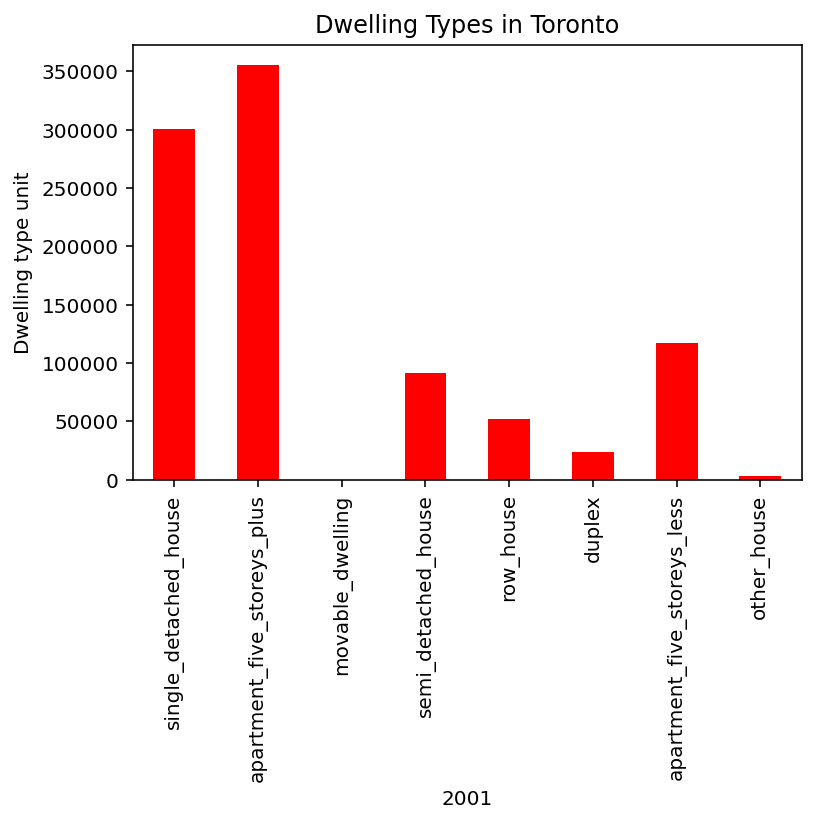
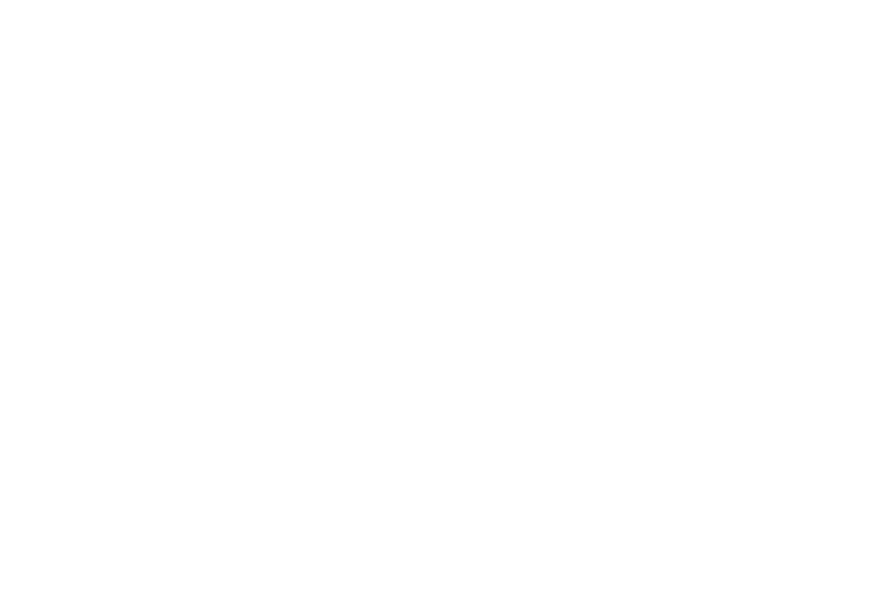
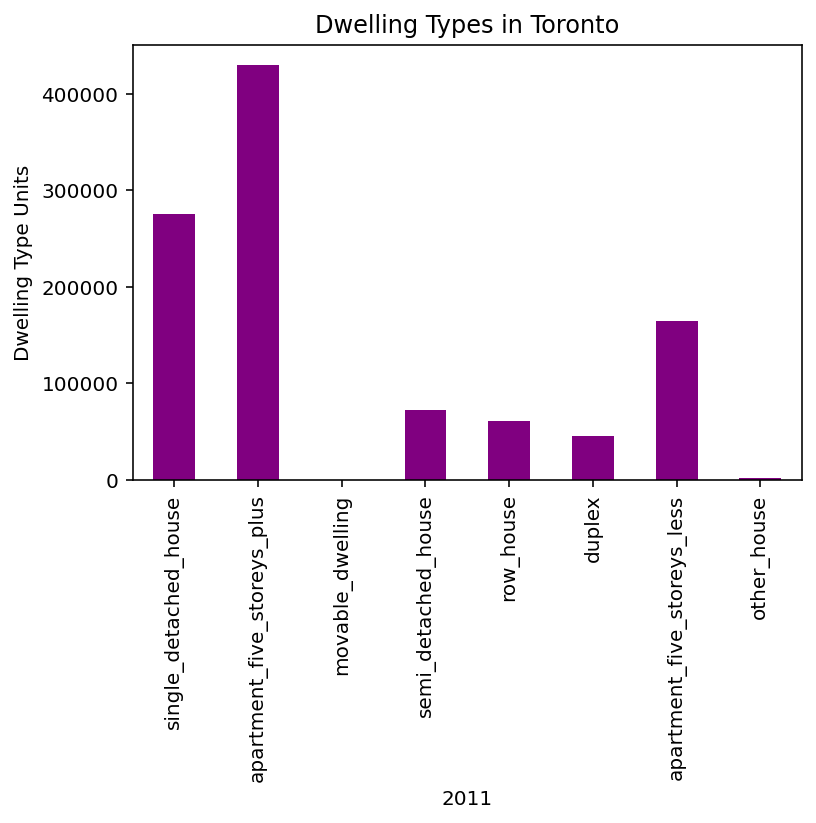

In [12]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [27]:
# neighbourhood_map().show()

In [57]:
def create_line_chart(data, title, xlabel, ylabel, color):
    fig=plt.figure()
    first_line = data.plot.line(color=color)
    first_line.set_title(title)
    first_line.set_xlabel(xlabel)
    first_line.set_ylabel(ylabel)
    
    plt.show()

# Bar chart for 2001

create_bar_chart(to_dwellings_df.loc[2001],"Dwelling Types in Toronto", "2001","Dwelling type unit","red")

# Bar chart for 2006

create_bar_chart(to_dwellings_df.loc[2006],"Dwelling Types in Toronto", "2006","Dwelling type unit","blue")

# Bar chart for 2011

create_bar_chart(to_dwellings_df.loc[2011],"Dwelling Types in Toronto", "2011","Dwelling type unit","purple")

# Bar chart for 2016
create_bar_chart(to_dwellings_df.loc[2016],"Dwelling Types in Toronto", "2016","Dwelling type unit","green")

KeyError: 2001

<Figure size 432x288 with 0 Axes>

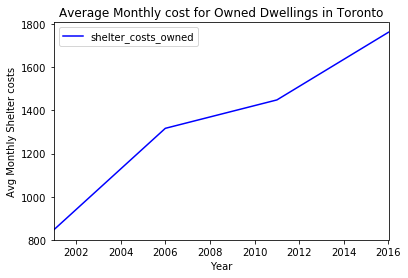

<Figure size 432x288 with 0 Axes>

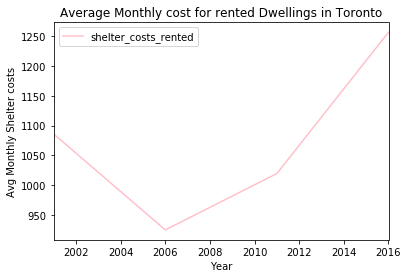

In [51]:
# create_line_chart(data, title, xlabel, ylabel, color)
def create_line_chart(data, title, xlabel, ylabel, color):
    fig=plt.figure()
    first_line = data.plot.line(color=color)
    first_line.set_title(title)
    first_line.set_xlabel(xlabel)
    first_line.set_ylabel(ylabel)
    
    plt.show()

# Line chart for owned dwellings
create_line_chart(owned_shelter,"Average Monthly cost for Owned Dwellings in Toronto", "Year","Avg Monthly Shelter costs","blue")


# Line chart for rented dwellings
create_line_chart(rented_shelter,"Average Monthly cost for rented Dwellings in Toronto", "Year","Avg Monthly Shelter costs","pink")


<Figure size 432x288 with 0 Axes>

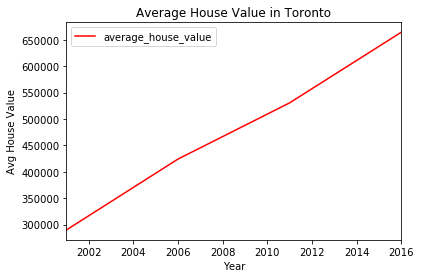

In [56]:
# average_house_value()
create_line_chart(avr_house_df,"Average House Value in Toronto", "Year","Avg House Value","red")

In [ ]:
# average_value_by_neighbourhood()

In [ ]:
# number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [ ]:
# top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()